In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_BRCpofr.csv')

In [3]:
test_df = pd.read_csv('test_koRSKBP.csv')

In [4]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [5]:
train_data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [6]:
train_data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [7]:
train_data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
train_data.describe(include='all')

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.00,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.50,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.75,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.50,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.25,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


In [10]:
train_data.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [12]:
train_data.corr()

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


In [13]:
train_data.shape

(89392, 12)

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

We have 7 categorical features : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


In [15]:
train_data_ = train_data.select_dtypes(exclude=['int', 'float'])
for col in train_data_.columns:
    print(train_data_[col].unique()) # to print categories name only
#     print(train_data_[col].value_counts()) # to print count of every category

['Male' 'Female']
['Urban' 'Rural']
['Bachelor' 'High School' 'Others']
['5L-10L' 'More than 10L' '2L-5L' '<=2L']
['More than 1' '1']
['A' 'C' 'B']
['Platinum' 'Gold' 'Silver']


In [16]:
# # replacing values
# train_data['gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
# train_data['area'].replace(['Urban', 'Rural'],[0, 1], inplace=True)
# train_data['qualification'].replace(['Bachelor', 'High School','Others'],[0, 1,2], inplace=True)
# train_data['income'].replace(['5L-10L', 'More than 10L','2L-5L','<=2L'],[0, 1,2,3], inplace=True)
# train_data['num_policies'].replace(['More than 1', '1'],[0, 1], inplace=True)
# train_data['policy'].replace(['A', 'B','C'],[0, 1, 2], inplace=True)
# train_data['type_of_policy'].replace(['Platinum', 'Gold','Silver'],[0, 1, 2], inplace=True)

In [17]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,0,0,0,0,1,5,5790,0,0,0,64308
1,2,0,1,1,0,0,8,5080,0,0,0,515400
2,3,0,0,0,0,1,8,2599,0,0,0,64212
3,4,1,1,1,0,0,7,0,0,0,0,97920
4,5,0,0,1,1,1,6,3508,0,0,1,59736


In [18]:
# train_data = train_data.select_dtypes(exclude=['int', 'float'])
# for col in train_data_.columns:
#     print(train_data_[col].unique()) # to print categories name only
# #     print(train_data_[col].value_counts()) # to print count of every category

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              89392 non-null  int64
 1   gender          89392 non-null  int64
 2   area            89392 non-null  int64
 3   qualification   89392 non-null  int64
 4   income          89392 non-null  int64
 5   marital_status  89392 non-null  int64
 6   vintage         89392 non-null  int64
 7   claim_amount    89392 non-null  int64
 8   num_policies    89392 non-null  int64
 9   policy          89392 non-null  int64
 10  type_of_policy  89392 non-null  int64
 11  cltv            89392 non-null  int64
dtypes: int64(12)
memory usage: 8.2 MB


In [20]:
# Changing the existing data types into the required data types for the some features for better EDA
objects = [features for features in train_data.columns if train_data[features].dtypes=='O']
for i in objects:
    if i != 'cltv':
        train_data[i] = train_data[i].astype(float)

In [21]:
train_data.dtypes

id                int64
gender            int64
area              int64
qualification     int64
income            int64
marital_status    int64
vintage           int64
claim_amount      int64
num_policies      int64
policy            int64
type_of_policy    int64
cltv              int64
dtype: object

<AxesSubplot:>

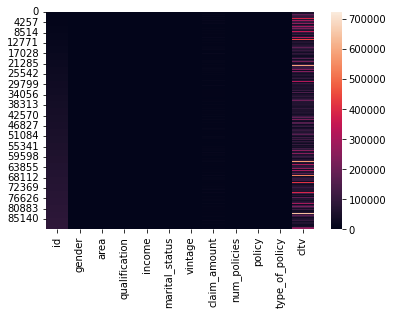

In [22]:
sns.heatmap(train_data)

<AxesSubplot:>

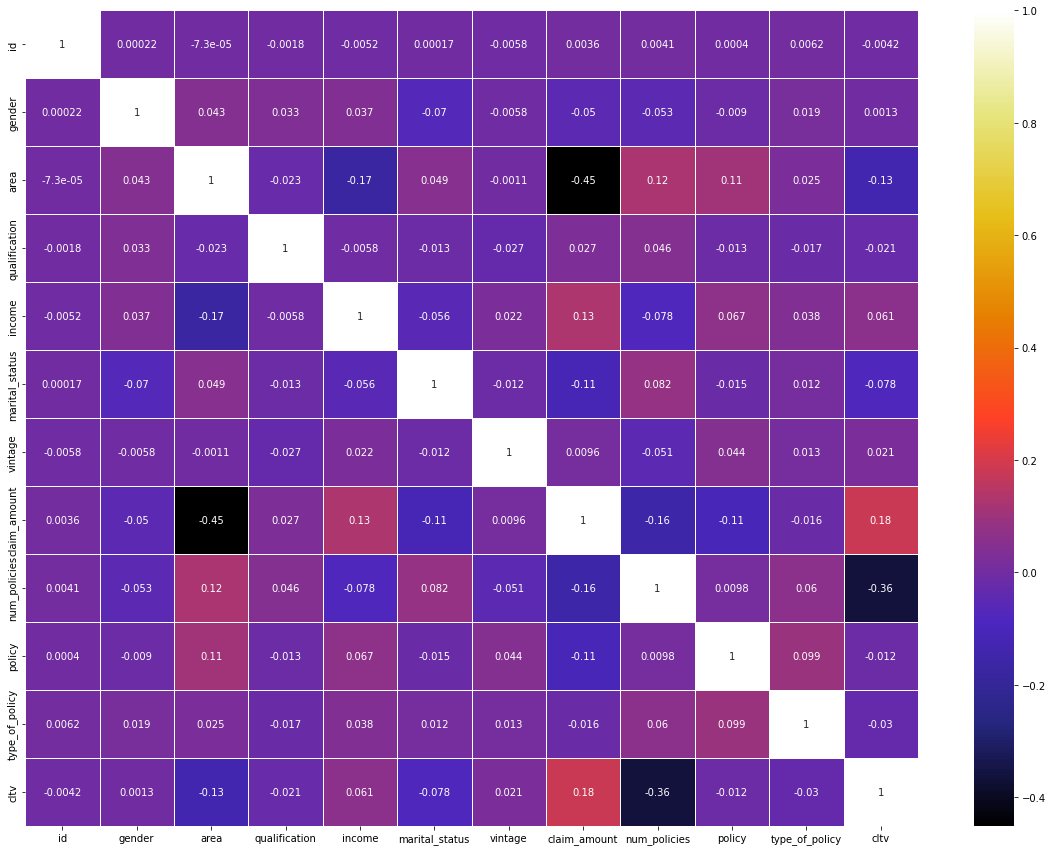

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "CMRmap",xticklabels="auto", yticklabels="auto")

In [24]:
corr = train_data.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:                       id    gender      area  qualification    income  \
id              1.000000  0.000215 -0.000073      -0.001803 -0.005173   
gender          0.000215  1.000000  0.042516       0.033076  0.036720   
area           -0.000073  0.042516  1.000000      -0.022908 -0.173256   
qualification  -0.001803  0.033076 -0.022908       1.000000 -0.005753   
income         -0.005173  0.036720 -0.173256      -0.005753  1.000000   
marital_status  0.000171 -0.070468  0.048739      -0.012618 -0.055991   
vintage        -0.005824 -0.005827 -0.001145      -0.027283  0.021754   
claim_amount    0.003634 -0.049773 -0.451054       0.027440  0.131812   
num_policies    0.004105 -0.052871  0.121898       0.045894 -0.077643   
policy          0.000395 -0.009049  0.107123      -0.012722  0.067357   
type_of_policy  0.006179  0.018847  0.025001      -0.016678  0.038156   
cltv           -0.004223  0.001318 -0.133107      -0.021330  0.061099   

                marita

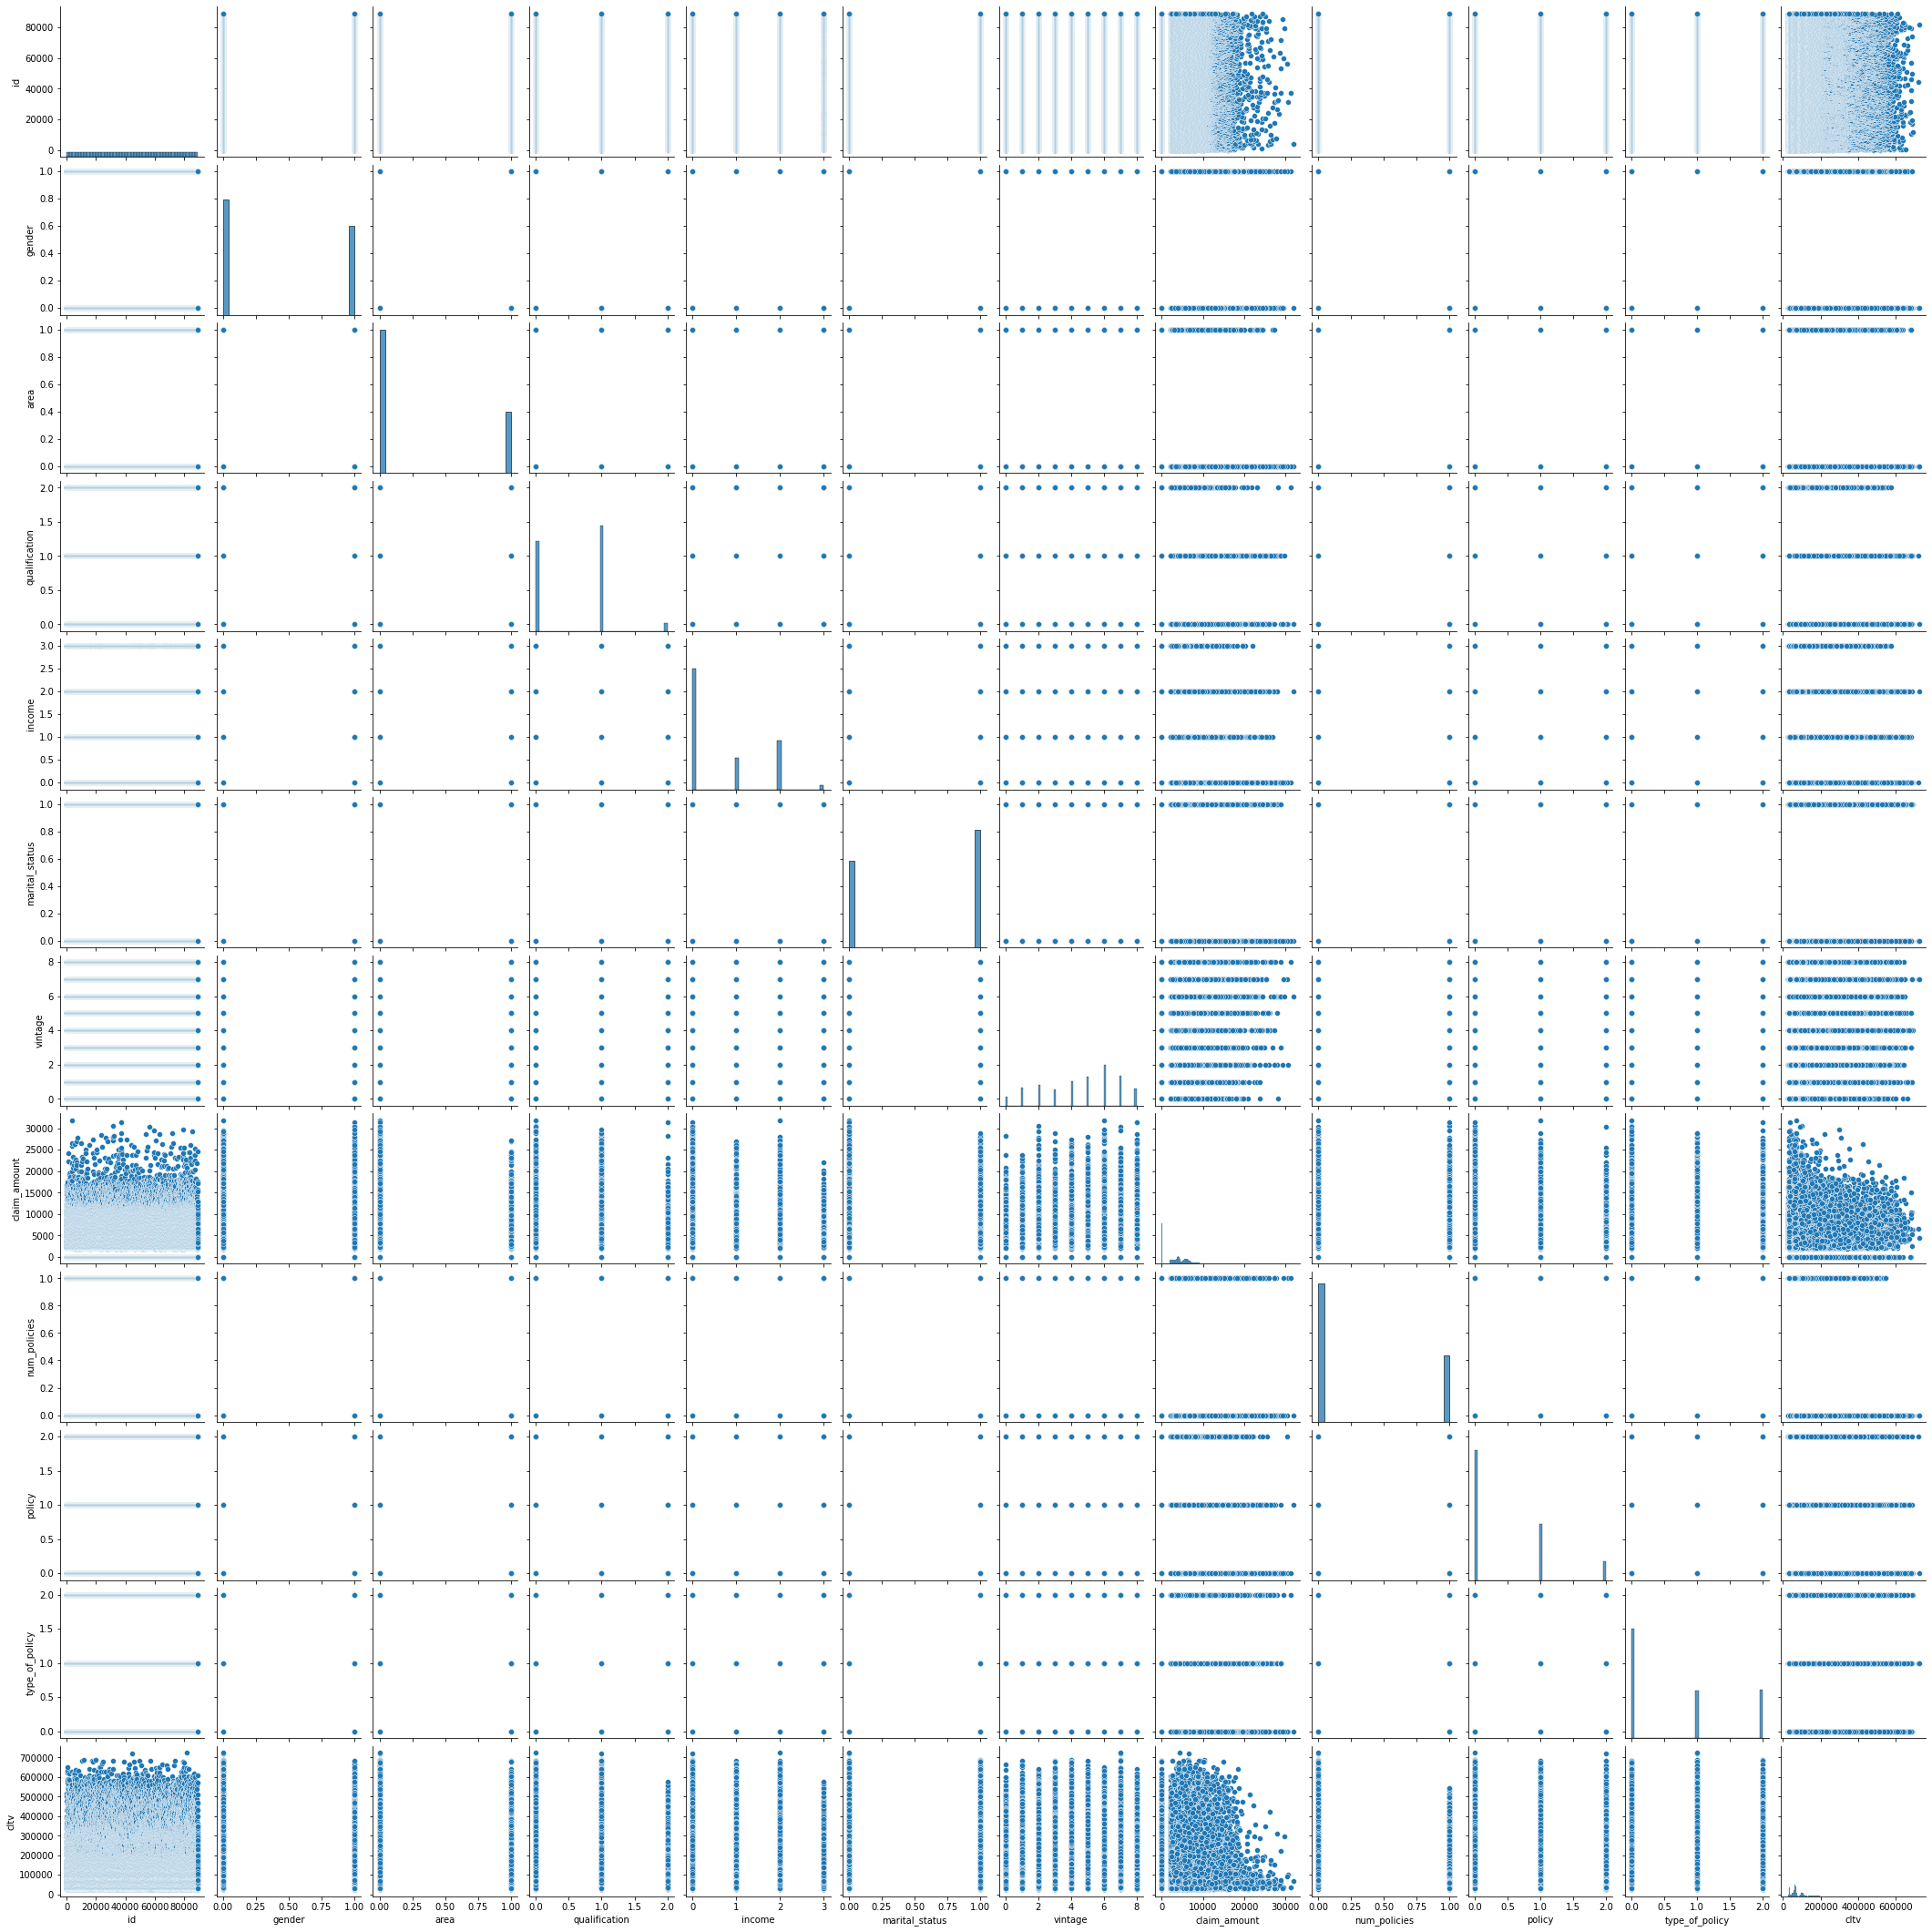

In [25]:
sns.pairplot(train_data)

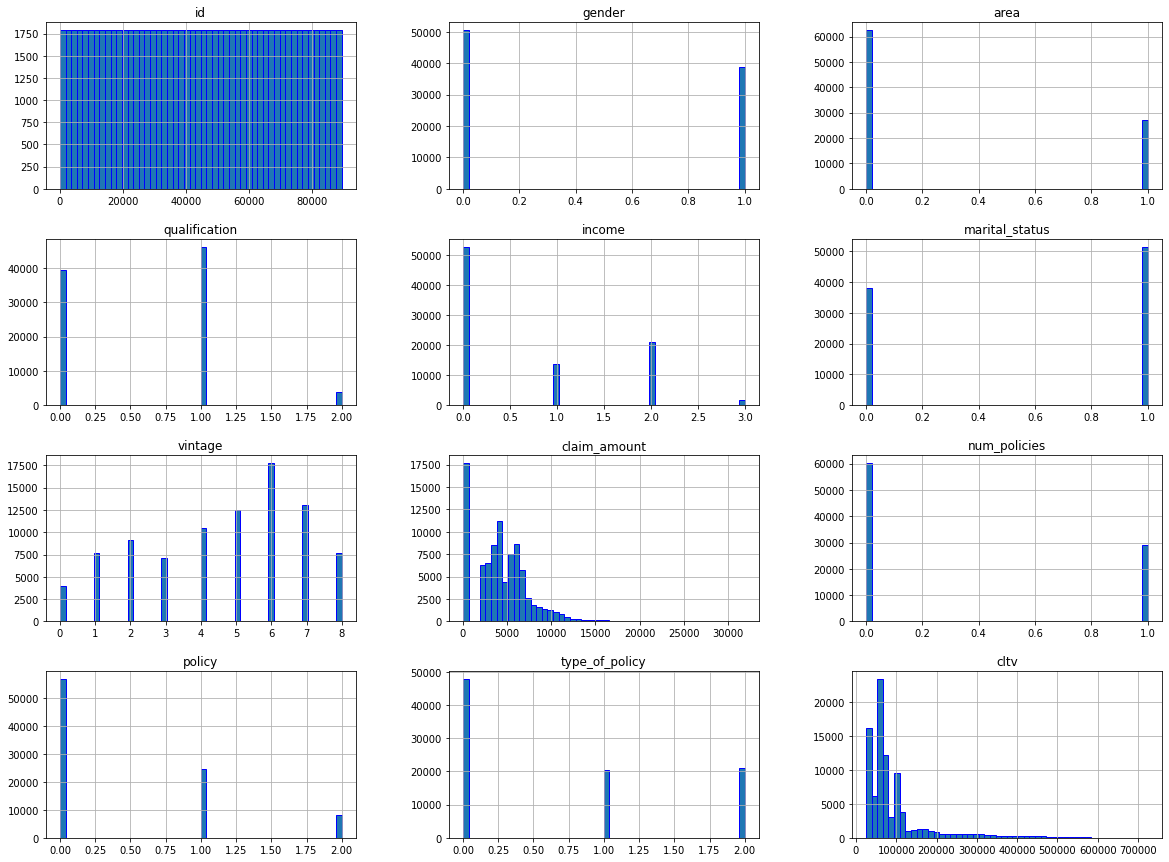

In [26]:
train_data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [31]:
X = train_data.drop(['id','gender', 'area', 'qualification', 'marital_status'],axis=1)
Y = train_data['cltv']

In [34]:
X.columns

Index(['income', 'vintage', 'claim_amount', 'num_policies', 'policy',
       'type_of_policy', 'cltv'],
      dtype='object')

In [35]:
Y

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [36]:
X

,income,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,0,5,5790,0,0,0,64308
1,0,8,5080,0,0,0,515400
2,0,8,2599,0,0,0,64212
3,0,7,0,0,0,0,97920
4,1,6,3508,0,0,1,59736
...,...,...,...,...,...,...,...
89387,1,6,0,0,1,0,95736
89388,0,0,3897,0,0,0,67596
89389,0,4,3363,0,1,0,114120
89390,2,8,0,0,1,0,71772


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=20)

In [39]:
!pip install lazypredict

     ---------------------------------------- 1.0/1.0 MB 5.0 MB/s eta 0:00:00


In [40]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
lazy_reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

 24%|███████████████████▌                                                              | 10/42 [00:29<02:18,  4.33s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 26.7 GiB for an array with shape (59892, 59892) and data type float64


 40%|█████████████████████████████████▏                                                | 17/42 [00:42<00:40,  1.61s/it]

KernelRidge model failed to execute
Unable to allocate 26.7 GiB for an array with shape (59892, 59892) and data type float64


 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [10:21<06:48, 37.12s/it]

QuantileRegressor model failed to execute
Unable to allocate 26.7 GiB for an array with shape (59892, 59892) and data type float64


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [21:39<00:00, 30.93s/it]


In [41]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,1.00,1.00,0.00,0.16
HuberRegressor,1.00,1.00,0.00,1.78
OrthogonalMatchingPursuit,1.00,1.00,0.00,0.18
RANSACRegressor,1.00,1.00,0.00,0.36
LinearRegression,1.00,1.00,0.00,0.08
...,...,...,...,...
ElasticNetCV,0.02,0.03,89930.37,0.75
DummyRegressor,-0.00,-0.00,91086.26,0.06
NuSVR,-0.02,-0.02,92115.41,486.01
